### Sensor Network Simulation 
#### *Distributed estimation using a network of consensus-based filters*

Set up target & sensor network:

In [1]:
import sys
sys.path.append('..')
%matplotlib inline

import os
import settings.input
import settings.initialize

# Input (.json) files containing target, network
input_files = []
input_files.append(os.path.join("..", "settings","json_files", "target-rotating.json"))
input_files.append(os.path.join("..", "settings","json_files", "sensor-network-1.json"))

# Read input files
input_data = settings.input.read(input_files)

So that loads a 'default' target and sensor network. Any special matrices can be patched here before simulating:

In [2]:
input_data["scheme"] = "OMVF"
input_data["network"]["noise_covariances"]["3"] = [[300, 0], [0, 300]]
input_data["network"]["noise_covariances"]["6"] = [[300, 0], [0, 300]]

Run simulation:

Plotted history of sensor 2's measurements.
Plotted history of sensor 2's estimates.


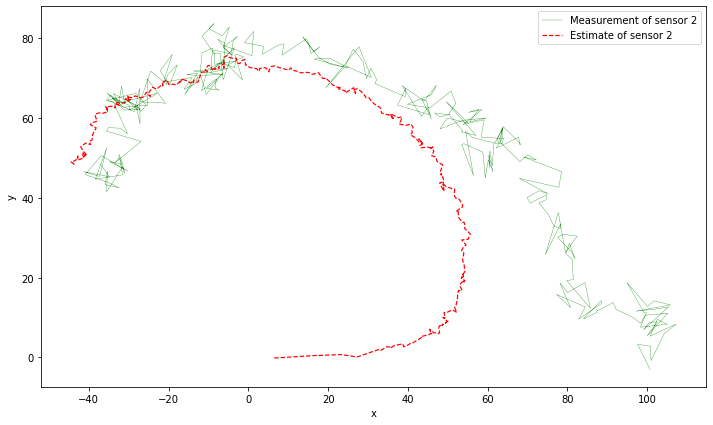

Plotted history of target coordinates.
Plotted history of sensor 3's measurements.
Plotted history of sensor 3's estimates.


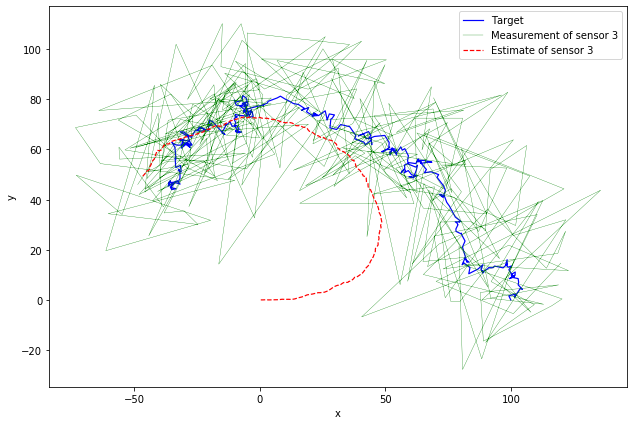

In [3]:
from sim.simulation import simulate
results = simulate(input_data, duration = 300, est_scheme="OIVF")

results.plot_xy(target=False, estimates_of="2", measurements_of="2")
results.plot_xy(target=True, estimates_of="3", measurements_of="3")

In [4]:
# vars(network.sensors["3"])

In [5]:
# from matplotlib import pyplot as plt
# import numpy.linalg as la
# FIGURE_SIZE = (7, 7)
# ErrCov_of = "3"

# plt.rcParams["figure.figsize"] = FIGURE_SIZE
# y_vals = [la.norm(_matrix, 'fro') for _matrix in kcf_h.sensors[ErrCov_of]["ErrCov"]]
# plt.plot(y_vals, label=f"KCF")
# y_vals = [la.norm(_matrix, 'fro') for _matrix in icf_h.sensors[ErrCov_of]["ErrCov"]]
# plt.plot(y_vals, label=f"ICF (2013)")
# y_vals = [la.norm(_matrix, 'fro') for _matrix in omvf_h.sensors[ErrCov_of]["ErrCov"]]
# plt.plot(y_vals, label=f"Optimal MVF")


# plt.xlabel("Iteration")
# plt.ylabel("Err Cov. (Frob. Norm)")
# plt.legend(loc='upper right')
# plt.show()

In [6]:
# from sim.noise import Noise
# from matplotlib.pyplot import plot, show
# x = []
# y = []
# for i in range(200):
#     a = Noise([[0.000002,0],[0,0.000002]]).sample()
#     x.append(a[0])
#     y.append(a[1])
    
# plot(x,y, 'ro')
# show()